<a href="https://colab.research.google.com/github/MaxZx3000/Forest-Fire/blob/main/Final_Project_Forest_Fire_Classifier_(Anthony_Kevin_Oktavius).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project Forest Fire Classifier

Dibuat oleh: Anthony Kevin Oktavius

Library Import

In [2]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from keras import backend as K

from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTENC
from keras.callbacks import EarlyStopping, ModelCheckpoint

## Data Loading

Mengunduh dataset forestfire.csv dari UCI Machine Learning Repository

In [3]:
dataset_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"

forest_fire_df = pd.read_csv(dataset_url)
forest_fire_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


Melihat info singkat pada dataset.

In [4]:
forest_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Melihat nilai statistika pada dataset forest fire.

In [5]:
forest_fire_df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Melakukan listing field-field pada dataset forest fire.


In [6]:
x_field = "X"
y_field = "Y"
month_field = "month"
day_field = "day"
ffmc_field = "FFMC"
dmc_field = "DMC"
dc_field = "DC"
isi_field = "ISI"
temp_field = "temp"
rh_field = "RH"
wind_field = "wind"
rain_field = "rain"
area_field = "area"

Mendefinisikan field numerikal dan kategorikal pada dataset forest fire.

In [7]:
categorical_variables = [x_field, y_field, month_field, day_field]
numerical_variables = [ffmc_field, dmc_field, dc_field, isi_field,
                       temp_field, rh_field, wind_field, rain_field, area_field]

Mendefinisikan field-field target dan features.

In [8]:
features = list(forest_fire_df.columns)
features.remove(area_field)
# features.remove(month_field)
# features.remove(day_field)
# features.remove(rain_field)
# features.remove(x_field)
# features.remove(y_field)

target = area_field

## Data Visualization

### Single Variable

Bar Plot - Comparison

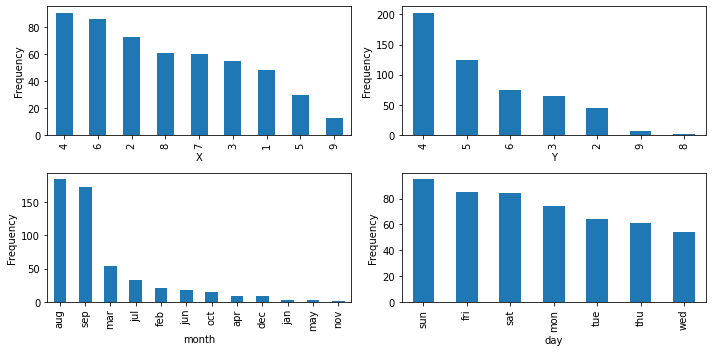

In [9]:
bar_plot_fields = categorical_variables.copy()

figure, axes = plt.subplots(2, 2, figsize = (10, 5))
axes = axes.flatten()


for index, field in enumerate(bar_plot_fields):
  forest_fire_df[field].value_counts().plot(kind = 'bar', 
                                            ax = axes[index],
                                            xlabel = field,
                                            ylabel = "Frequency")

plt.tight_layout()
plt.show()

Dist plot - Distribution

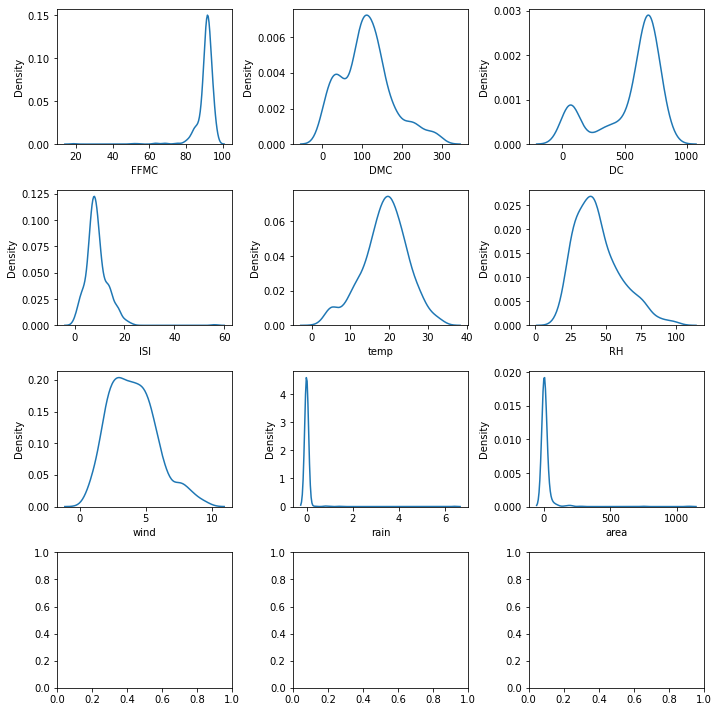

In [10]:
dist_plot_fields = numerical_variables.copy()

figure, axes = plt.subplots(4, 3, figsize = (10, 10))
axes = axes.flatten()

for index, field in enumerate(dist_plot_fields):
  sns.kdeplot(forest_fire_df[field], ax = axes[index])

plt.tight_layout()
plt.show()

Box Plot - Distribution & Comparison & Outlier Detection

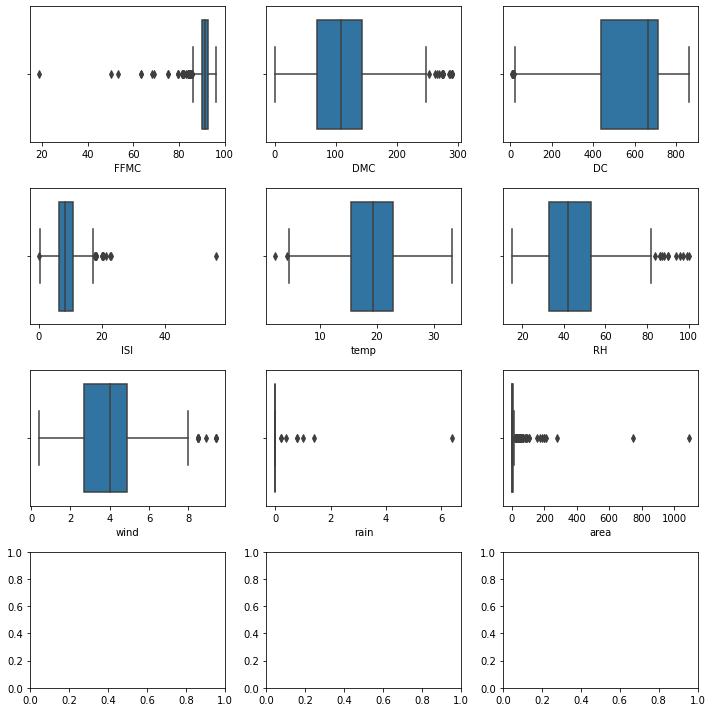

In [11]:
box_plot_fields = numerical_variables.copy()

figure, axes = plt.subplots(4, 3, figsize = (10, 10))
axes = axes.flatten()

for index, field in enumerate(box_plot_fields):
  sns.boxplot(data = forest_fire_df, x = field, ax = axes[index])

plt.tight_layout()
plt.show()

### Two Variables

Mean Bar Plot - Comparison

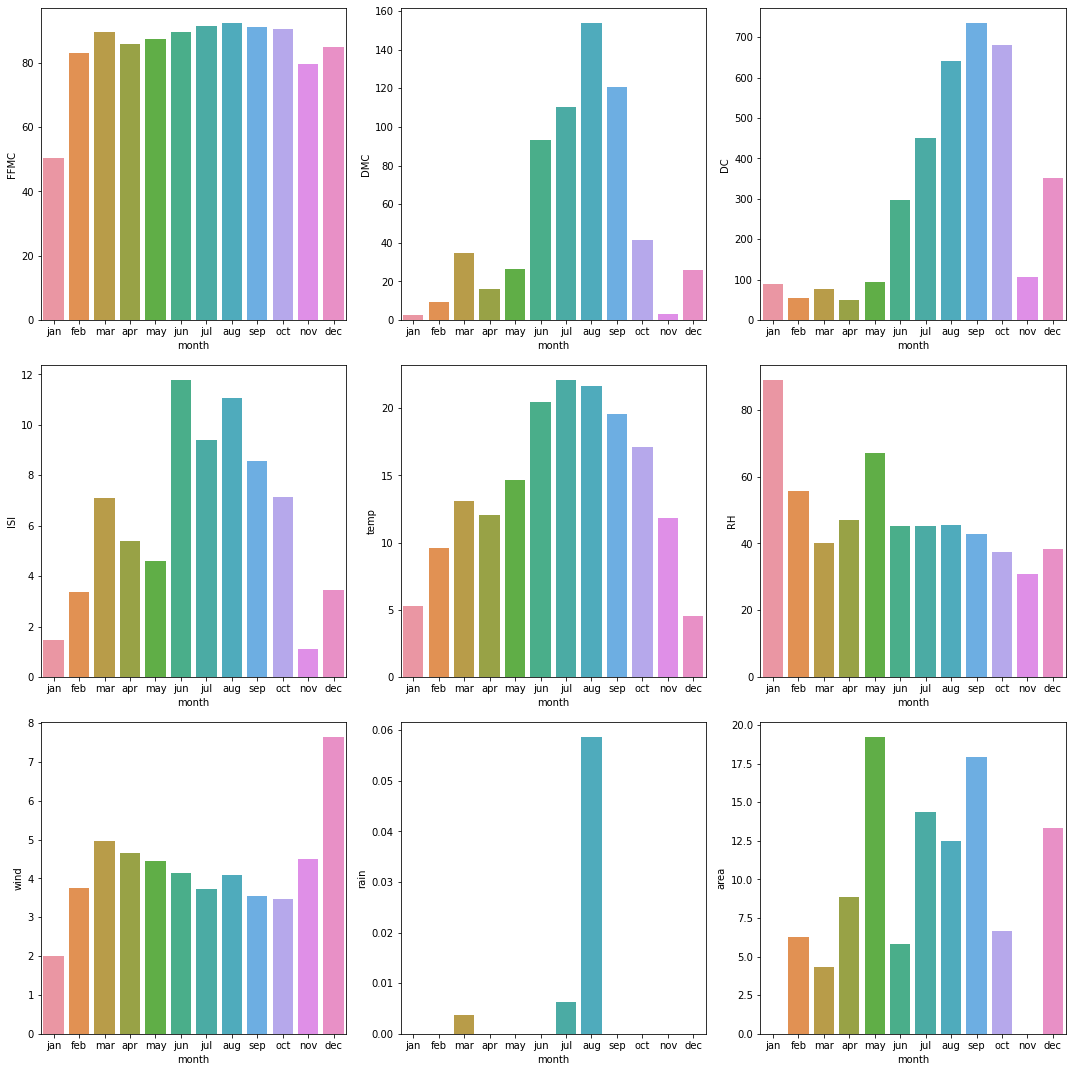

In [12]:
figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
axes = axes.flatten()

mean_bar_plot_fields = numerical_variables.copy()

for index, field in enumerate(mean_bar_plot_fields):
  sns.barplot(data = forest_fire_df, 
              x = month_field, 
              y = field,
              ax = axes[index],
              ci = None,
              order = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep",
                      "oct", "nov", "dec"])
  
plt.tight_layout()

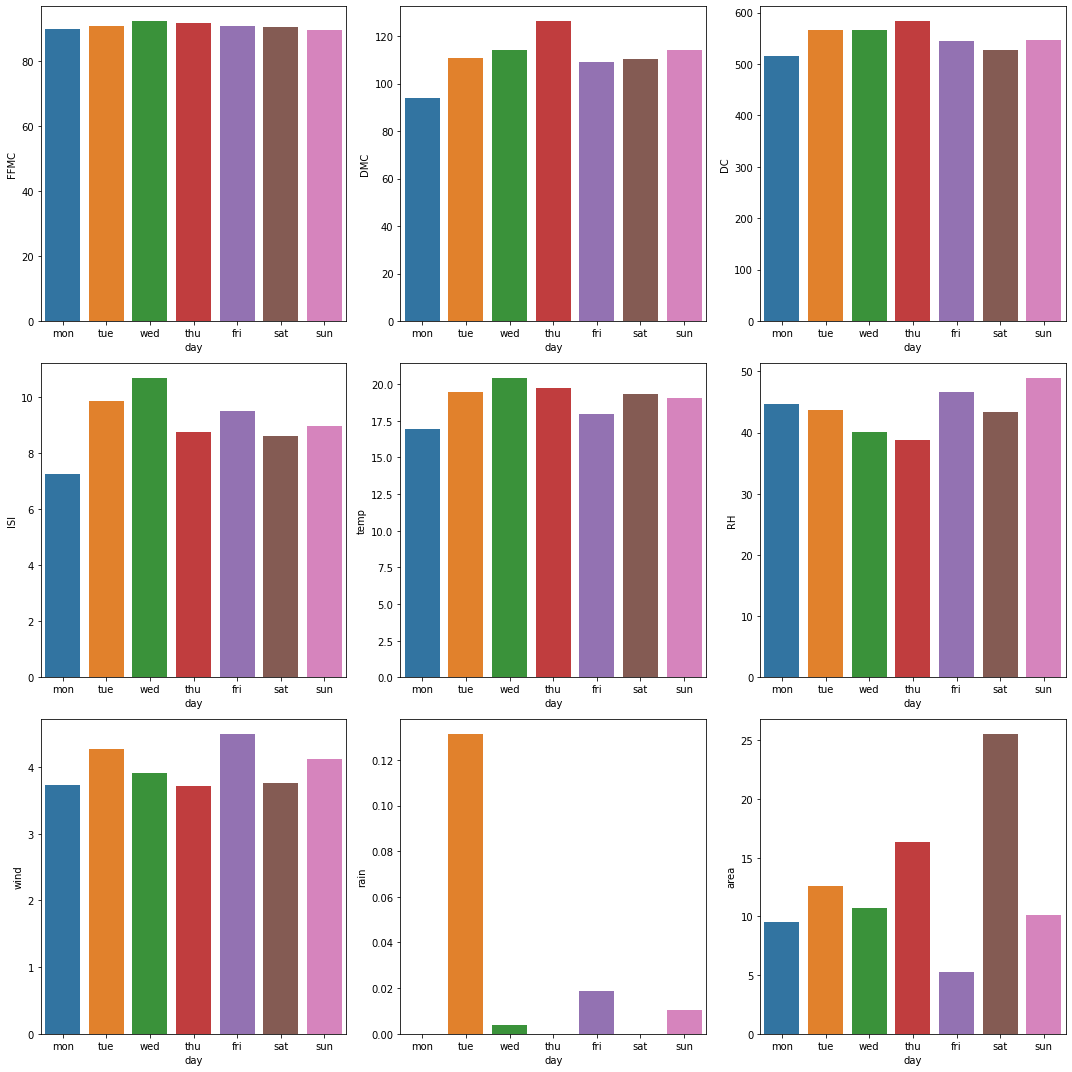

In [13]:
figure, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 15))
axes = axes.flatten()

mean_bar_plot_fields = numerical_variables.copy()

for index, field in enumerate(mean_bar_plot_fields):
  sns.barplot(data = forest_fire_df, 
              x = day_field, 
              y = field,
              ax = axes[index],
              ci = None,
              order = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
  
plt.tight_layout()

Multiple Bar Chart - Composition & Comparison

In [14]:
def make_multiple_bar_plot(df, x1, x2, y, cmap, ax, statistic, order):
  target_field_two_categorical_df = df.groupby([x1, x2]).mean()[y]

  mean_target_field_two_categorical_df = target_field_two_categorical_df.unstack(
      level = 1
  )

  mean_target_field_two_categorical_df = mean_target_field_two_categorical_df.reset_index()

  mean_target_field_two_categorical_df = pd.melt(
      mean_target_field_two_categorical_df,
      id_vars = x1,
      var_name = x2,
      value_name = y
  )
  
  sns.barplot(x = x1,
              y = y,
              hue = x2,
              data = forest_fire_df,
              ax = ax,
              ci = None,
              order = order)

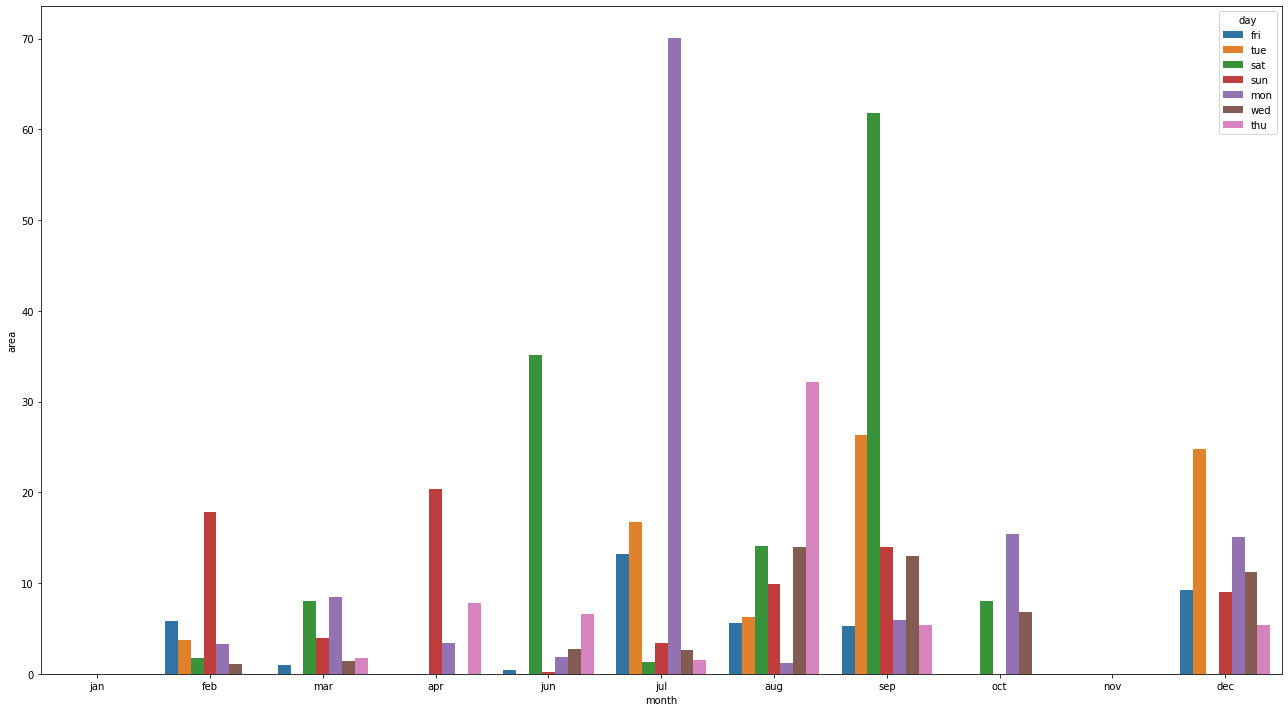

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

fig.set_figwidth(18)
fig.set_figheight(10)

multiple_bar_fields = categorical_variables.copy()
multiple_bar_fields.append(area_field)
    
make_multiple_bar_plot(forest_fire_df, 
                        x1 = month_field, 
                        x2 = day_field,
                        y = area_field, 
                        cmap = 'inferno',
                        ax = ax,
                        statistic = 'mean',
                        order =  ["jan", "feb", "mar", "apr", "jun", "jul", "aug", "sep",
                       "oct", "nov", "dec"])
  
plt.tight_layout()
plt.show()

### Multiple Variables

Correlation Plot - Correlation

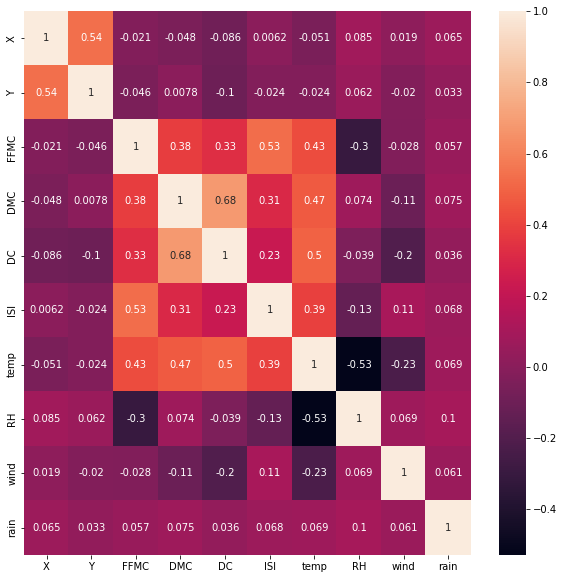

In [16]:
corr_plot_fields = features.copy()

plt.figure(figsize = (10, 10))
sns.heatmap(
    forest_fire_df[corr_plot_fields].corr(),
    annot = True,
)
plt.show()

Pairplot - Distribution & Comparison & Correlation

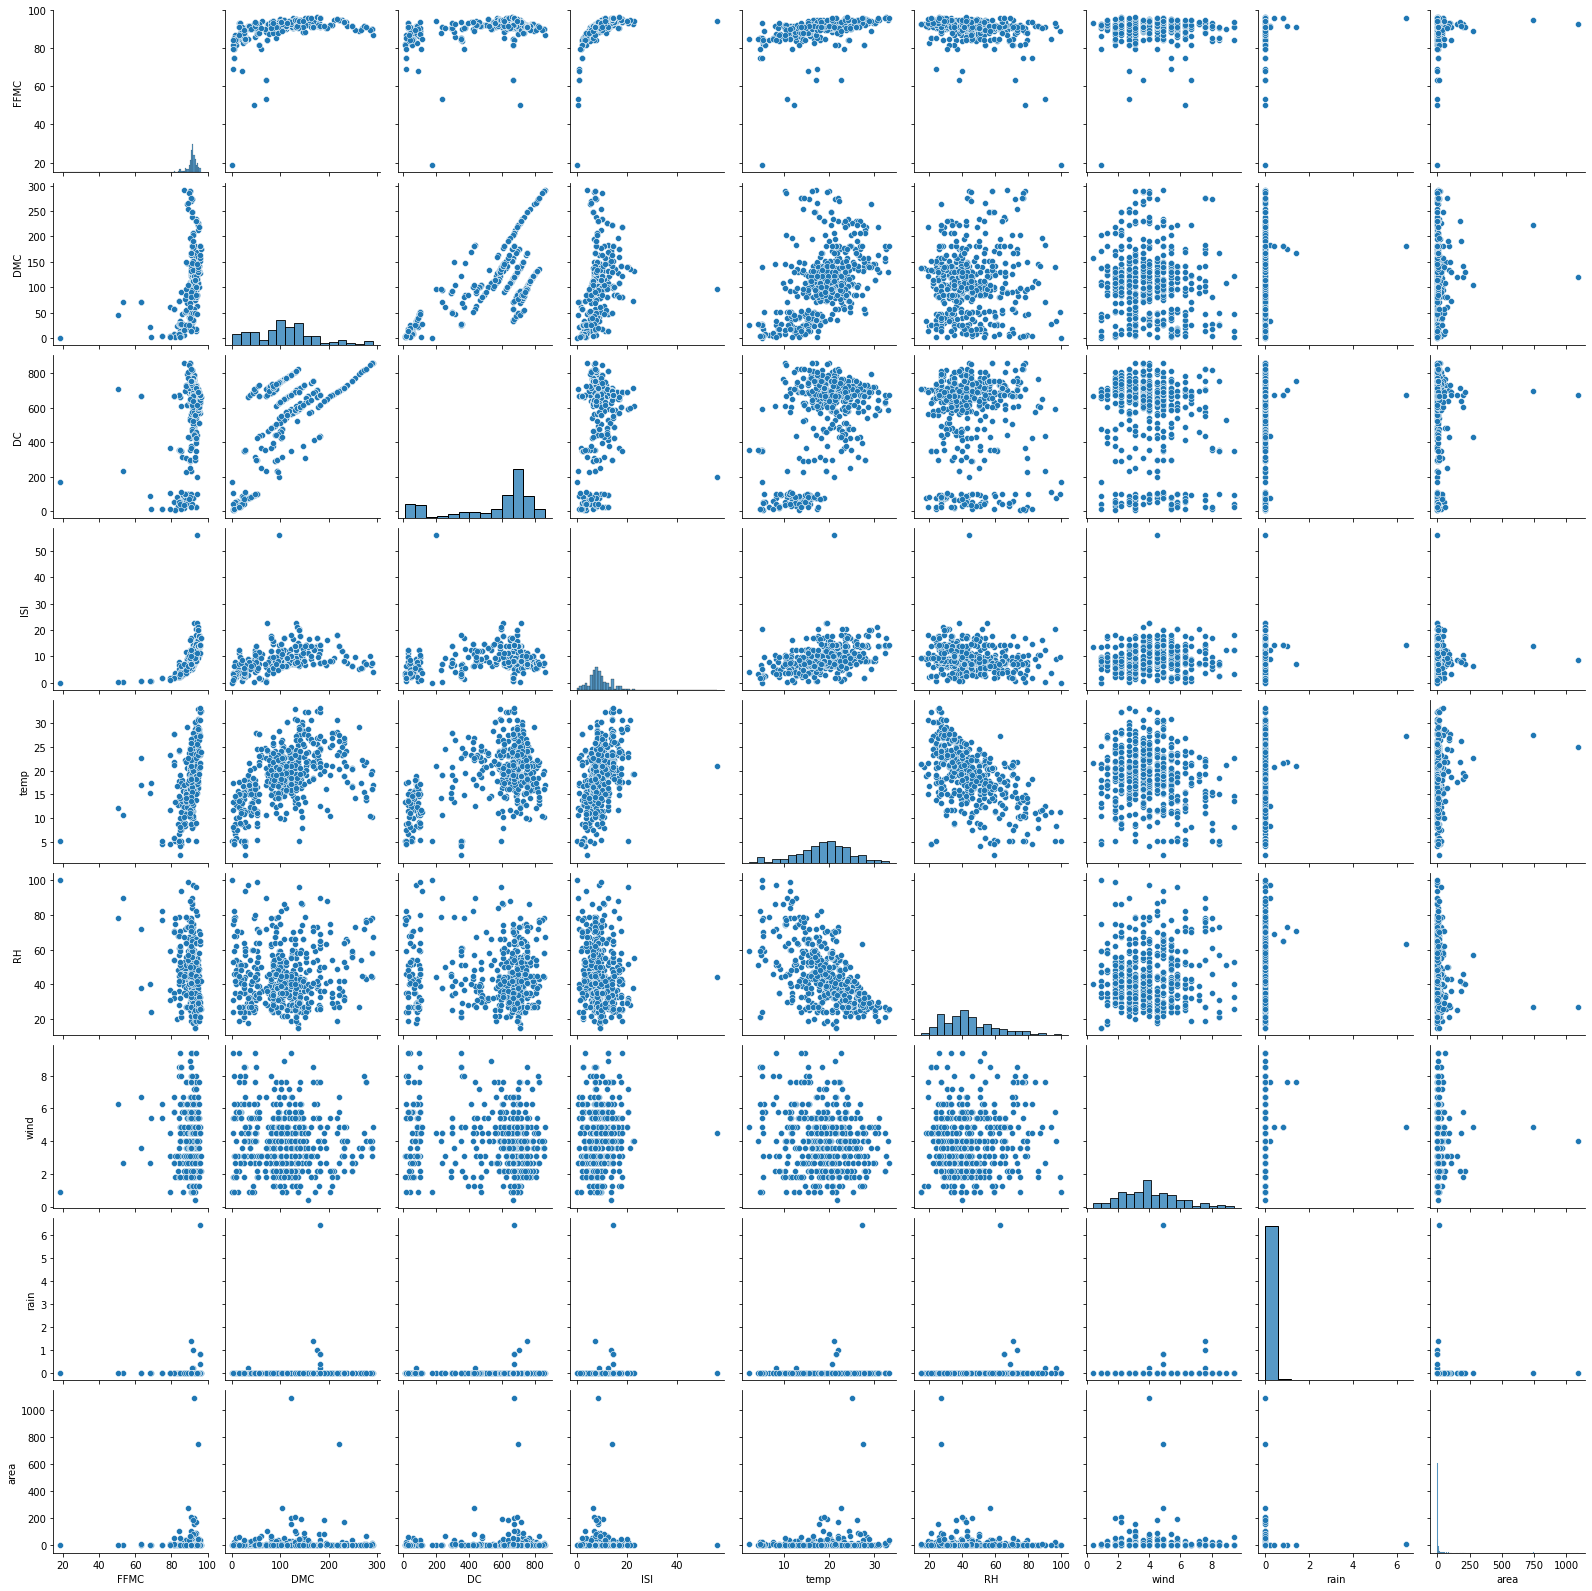

In [17]:
pairplot_fields = numerical_variables.copy()

sns.pairplot(
    data = forest_fire_df[pairplot_fields],
)

## Data Preprocessing

### Konversi Bulan dan Hari menjadi Angka

In [19]:
months = {
    'jan': 1, 
    'nov': 2,
    'mar': 3,
    'jun': 4,
    'oct': 5,
    'feb': 6,
    'apr': 7,
    'aug': 8,
    'dec': 9,
    'jul': 10,
    'sep': 11,
    'may': 12,
}

days = {
    'fri': 1,
    'mon': 2,
    'sun': 3,
    'wed': 4,
    'tue': 5,
    'thu': 6,
    'sat': 7,
}

In [20]:
month_day_converted_forest_fire_df = forest_fire_df.copy()
month_day_converted_forest_fire_df[month_field] = month_day_converted_forest_fire_df[month_field].replace(months)
month_day_converted_forest_fire_df[day_field] = month_day_converted_forest_fire_df[day_field].replace(days)

In [21]:
month_day_converted_forest_fire_df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,1,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,5,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,5,7,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,1,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,7,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00



### Area Feature Transformation dengan logarithm transformation.



In [22]:
log_transform_forest_fire_df = month_day_converted_forest_fire_df.copy()
log_transform_forest_fire_df[area_field] = np.log1p(log_transform_forest_fire_df[area_field])

### Feature Selection dengan Random Forest

In [23]:
random_forest = RandomForestRegressor(random_state = 100)
random_forest = random_forest.fit(
    log_transform_forest_fire_df[features],
    log_transform_forest_fire_df[target],
)

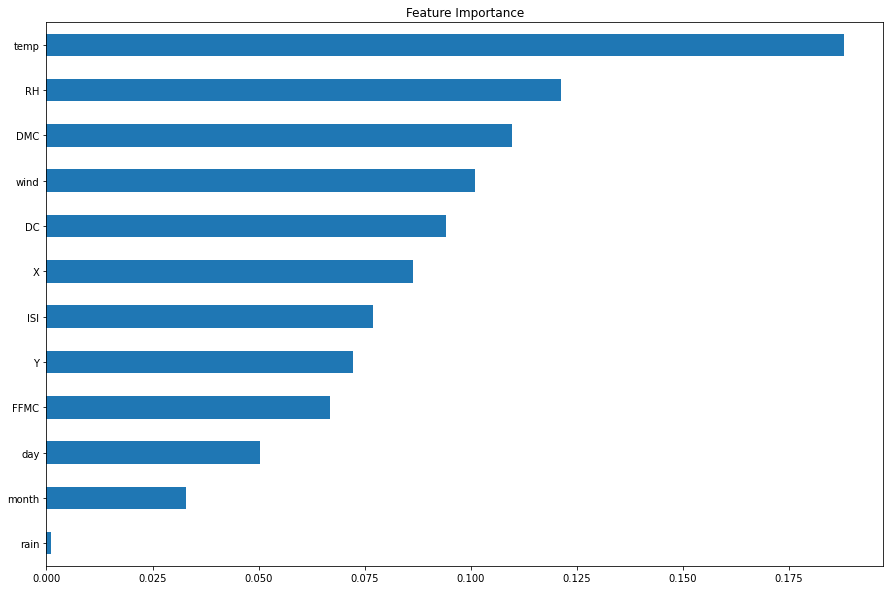

In [24]:
X_ = np.array(features)
importance_scores = random_forest.feature_importances_

plt.figure(figsize=(15, 10))
plt.title('Feature Importance')

feature_importances = pd.Series(random_forest.feature_importances_, index = X_)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')

plt.show()

### Train Test Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(
    log_transform_forest_fire_df[features],
    log_transform_forest_fire_df[target],
    test_size = 0.13
)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(449, 12)
(68, 12)
(449,)
(68,)


### MinMaxScaler

In [26]:
min_max_fields = features.copy()

x_train_scaled = x_train.copy()
x_test_scaled = x_test.copy()

y_train_scaled = pd.DataFrame(y_train.copy(), columns = [area_field])
y_test_scaled = pd.DataFrame(y_test.copy(), columns = [area_field])

min_max_scaler = MinMaxScaler()
x_train_scaled[min_max_fields] = min_max_scaler.fit_transform(x_train[min_max_fields])
x_test_scaled[min_max_fields] = min_max_scaler.transform(x_test[min_max_fields])

min_max_scaler = MinMaxScaler()
y_train_scaled[area_field] = min_max_scaler.fit_transform(y_train_scaled[[area_field]])
y_test_scaled[area_field] = min_max_scaler.transform(y_test_scaled[[area_field]])

### Post Data Visualization

#### Single Variable

In [27]:
def single_plot_template(df, fields, plot_type, title, nrows, ncols, figsize = (15, 15)):
  figure, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
  figure.suptitle(title)
  figure.subplots_adjust(top=0.96)

  axes = axes.flatten()
  for index, field in enumerate(fields):
    single_plot_function = eval(plot_type)
    single_plot_function(data = df, x = field, ax = axes[index])

  plt.tight_layout()
  plt.show()

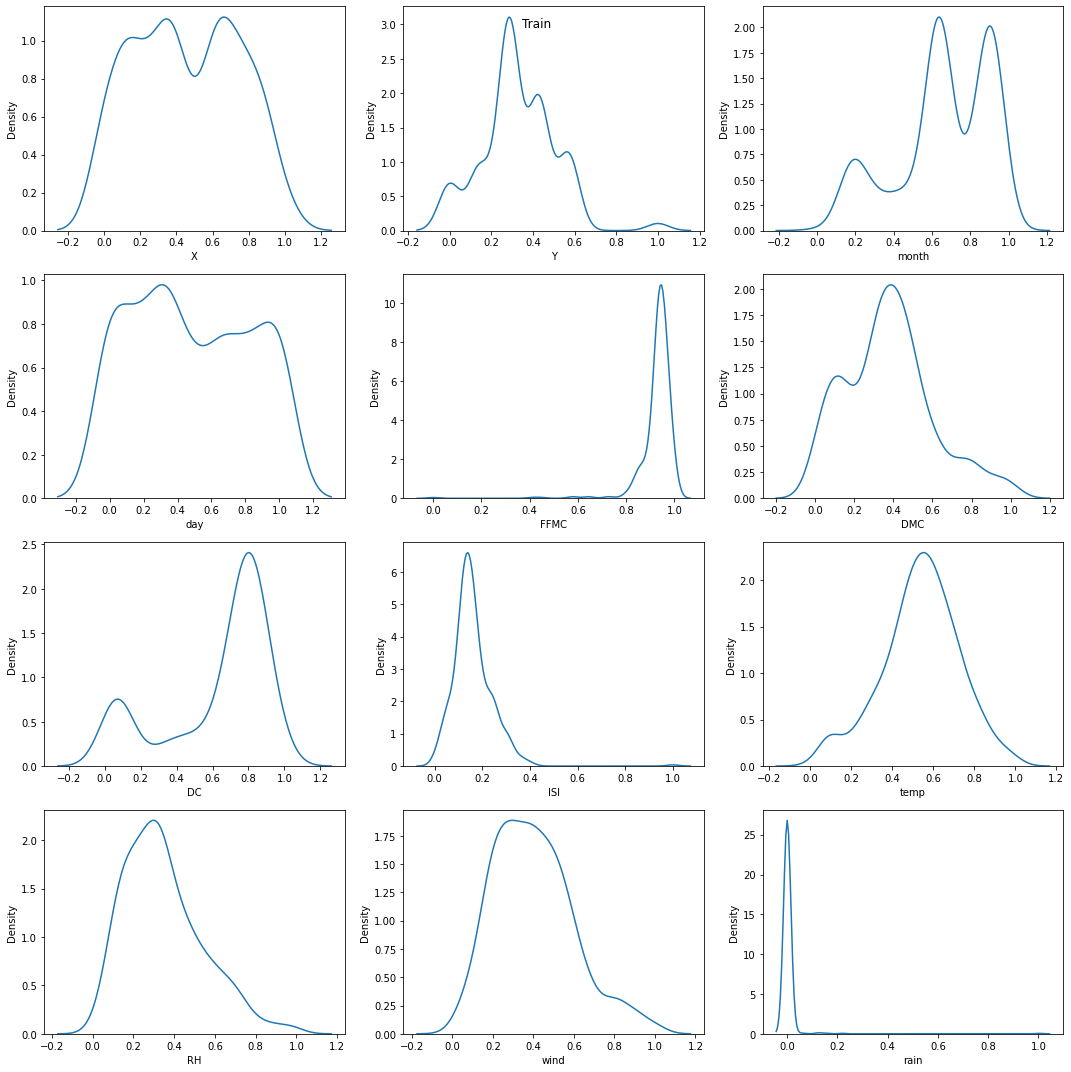

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


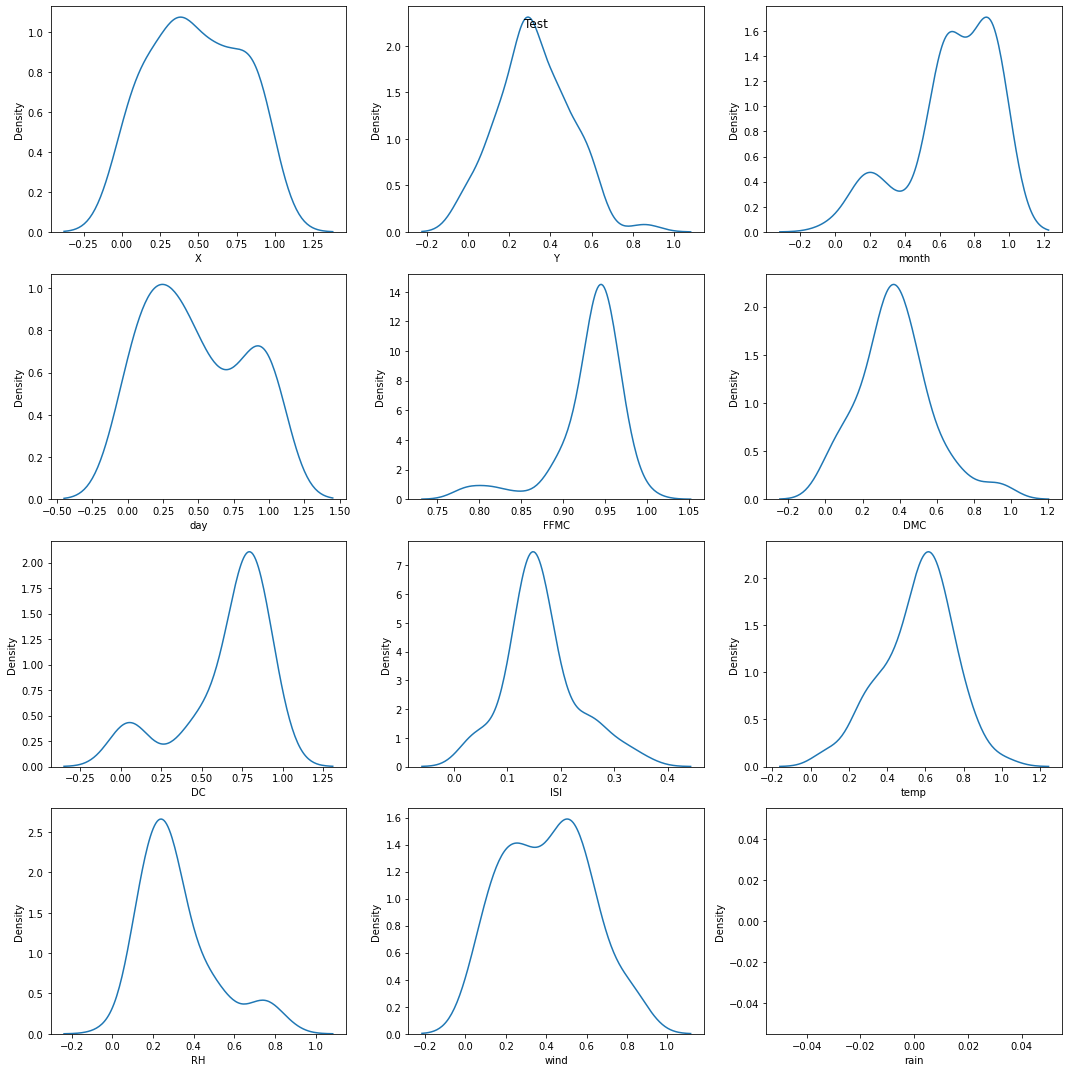

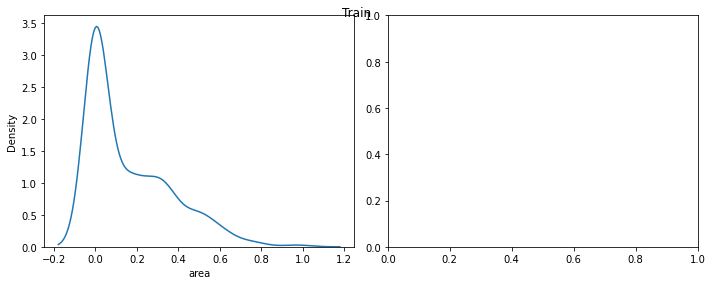

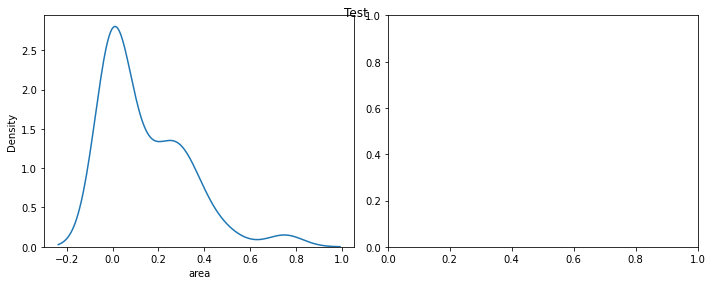

In [28]:
post_data_kde_fields = features.copy()

single_plot_template(df = x_train_scaled, 
                     fields = post_data_kde_fields, 
                     plot_type = "sns.kdeplot",
                     title = "Train",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = x_test_scaled, 
                     fields = post_data_kde_fields, 
                     plot_type = "sns.kdeplot",
                     title = "Test",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = y_train_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.kdeplot",
                     title = "Train",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

single_plot_template(df = y_test_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.kdeplot",
                     title = "Test",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

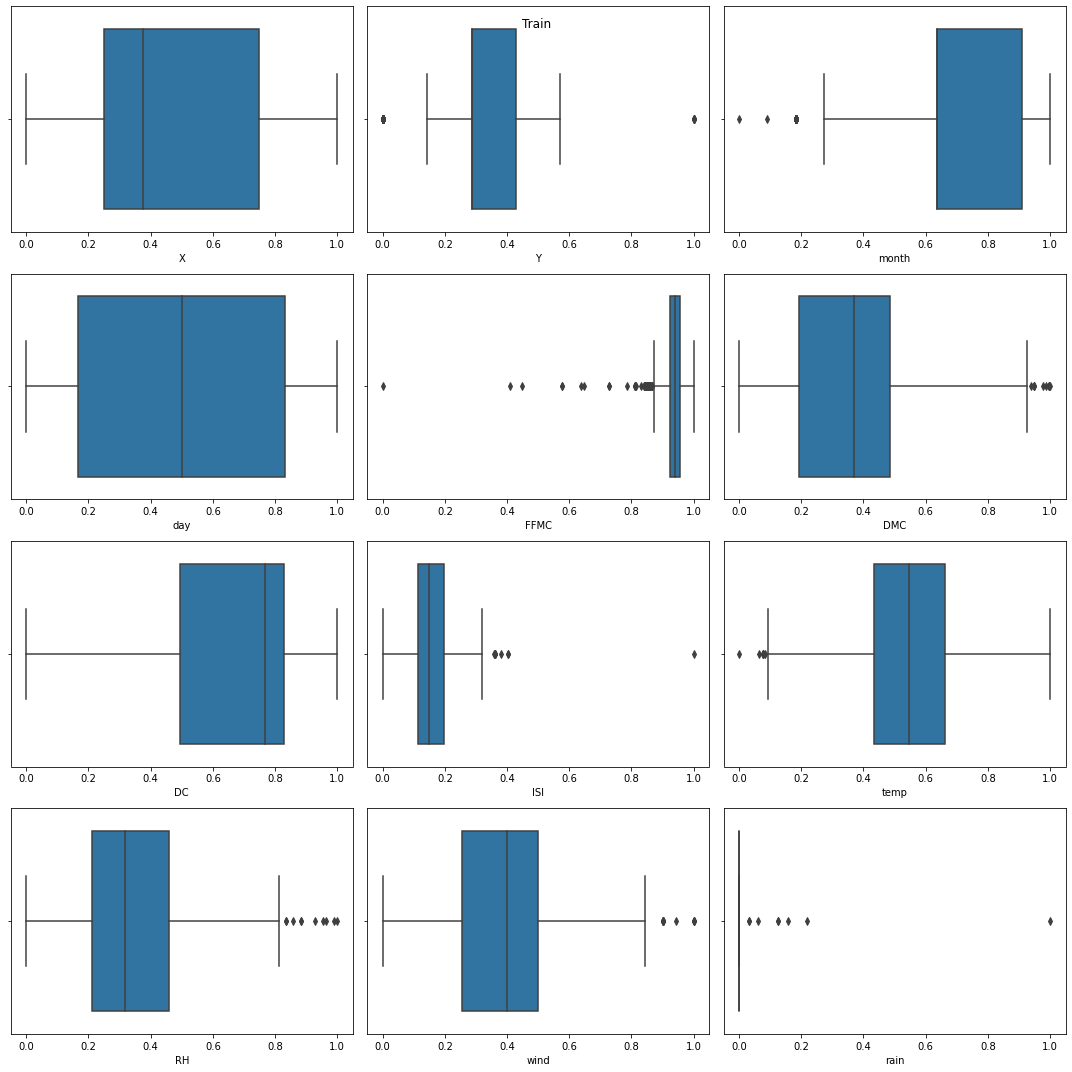

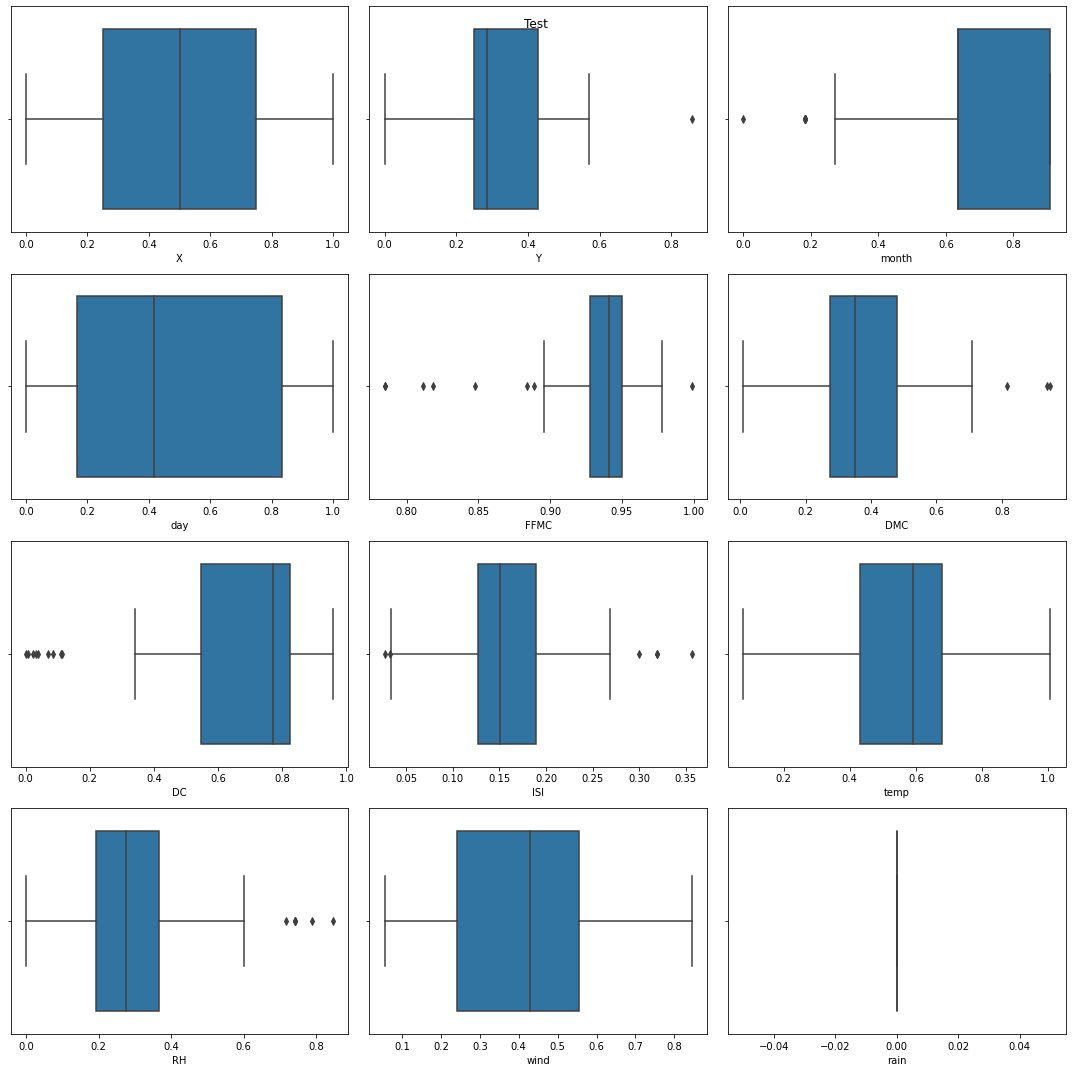

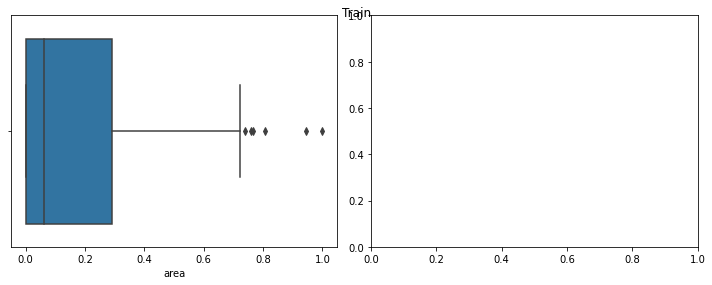

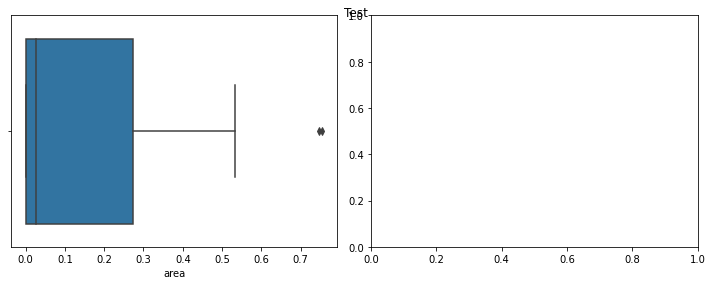

In [29]:
post_data_box_fields = features.copy()

single_plot_template(df = x_train_scaled, 
                     fields = post_data_box_fields, 
                     plot_type = "sns.boxplot",
                     title = "Train",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = x_test_scaled, 
                     fields = post_data_box_fields, 
                     plot_type = "sns.boxplot",
                     title = "Test",
                     nrows = 4, 
                     ncols = 3)

single_plot_template(df = y_train_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.boxplot",
                     title = "Train",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

single_plot_template(df = y_test_scaled, 
                     fields = [area_field], 
                     plot_type = "sns.boxplot",
                     title = "Test",
                     nrows = 1, 
                     ncols = 2,
                     figsize = (10, 4))

#### Mutliple Variables

In [30]:
def multiple_fields_plot_template(df, suptitle, plot_type):

  plot_function = eval(plot_type)
  try:
    plot_function(data = df, annot = True)
  except:
    plot_function(data = df)
    
  plt.suptitle(suptitle)
  plt.show()
  plt.tight_layout()

In [31]:
forest_fire_multiple_plots_df_train = pd.concat([x_train_scaled, y_train_scaled], axis = 1)
forest_fire_multiple_plots_df_test = pd.concat([x_test_scaled, y_test_scaled], axis = 1)

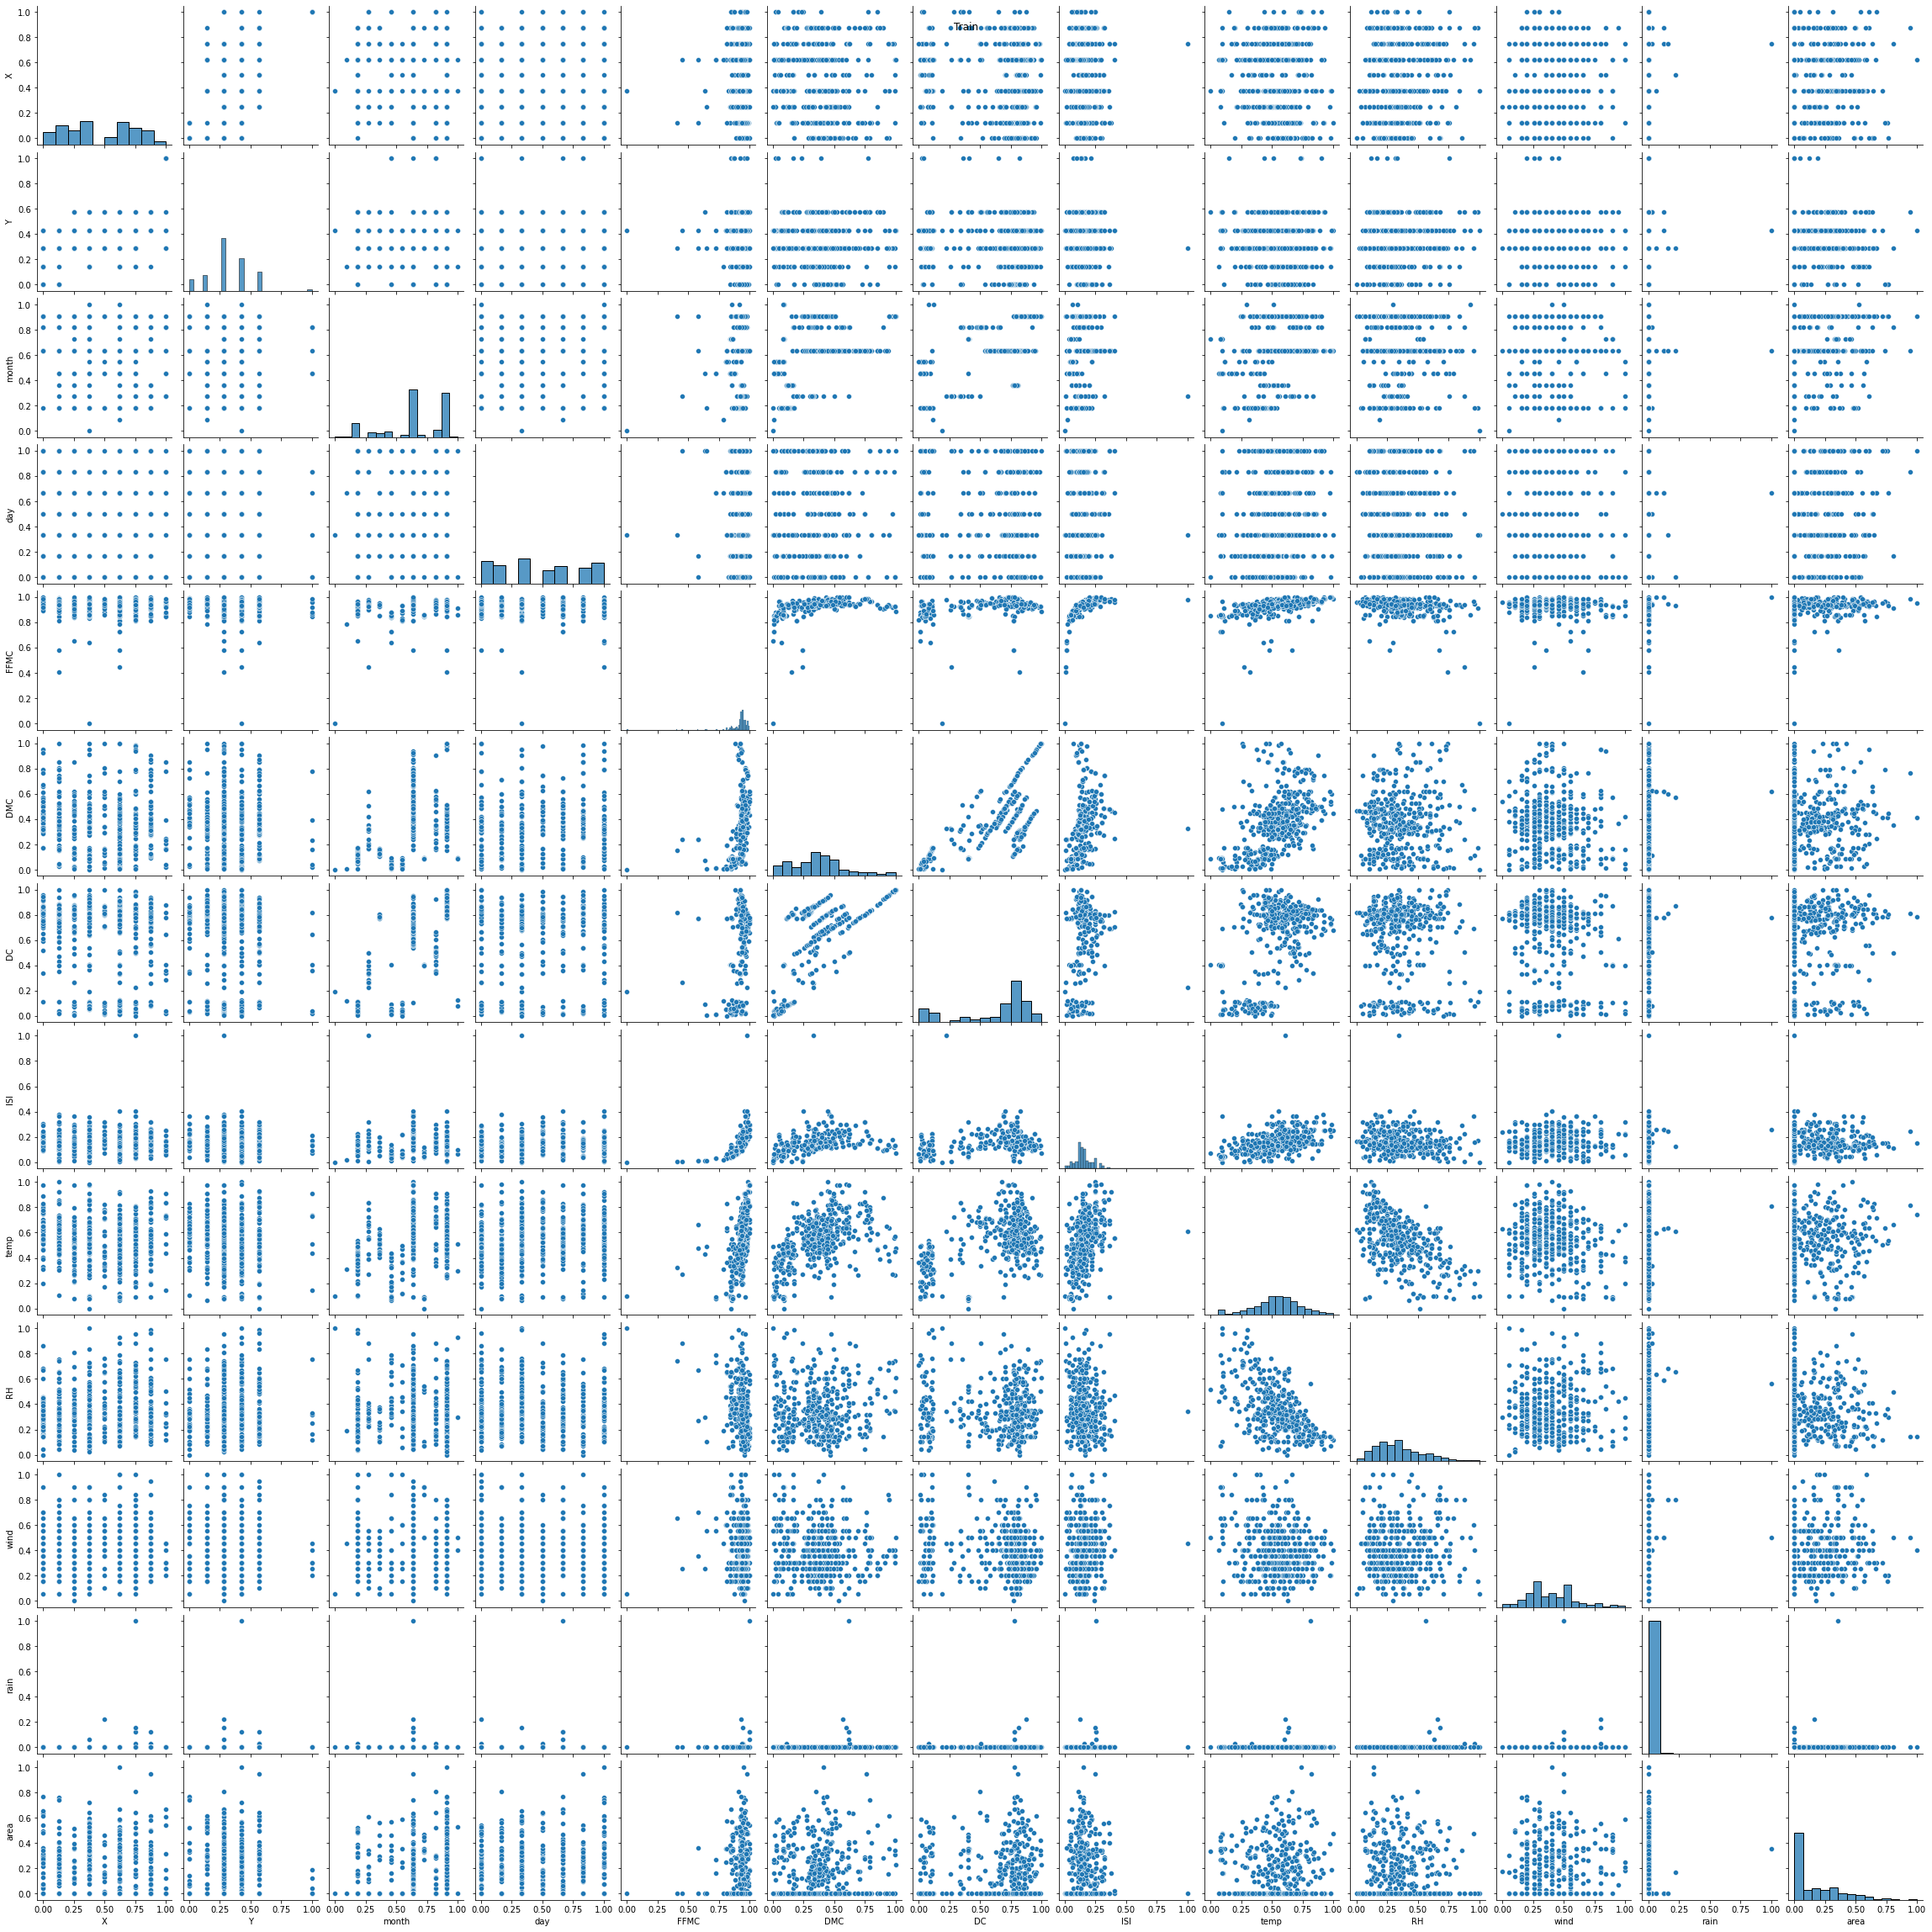

<Figure size 432x288 with 0 Axes>

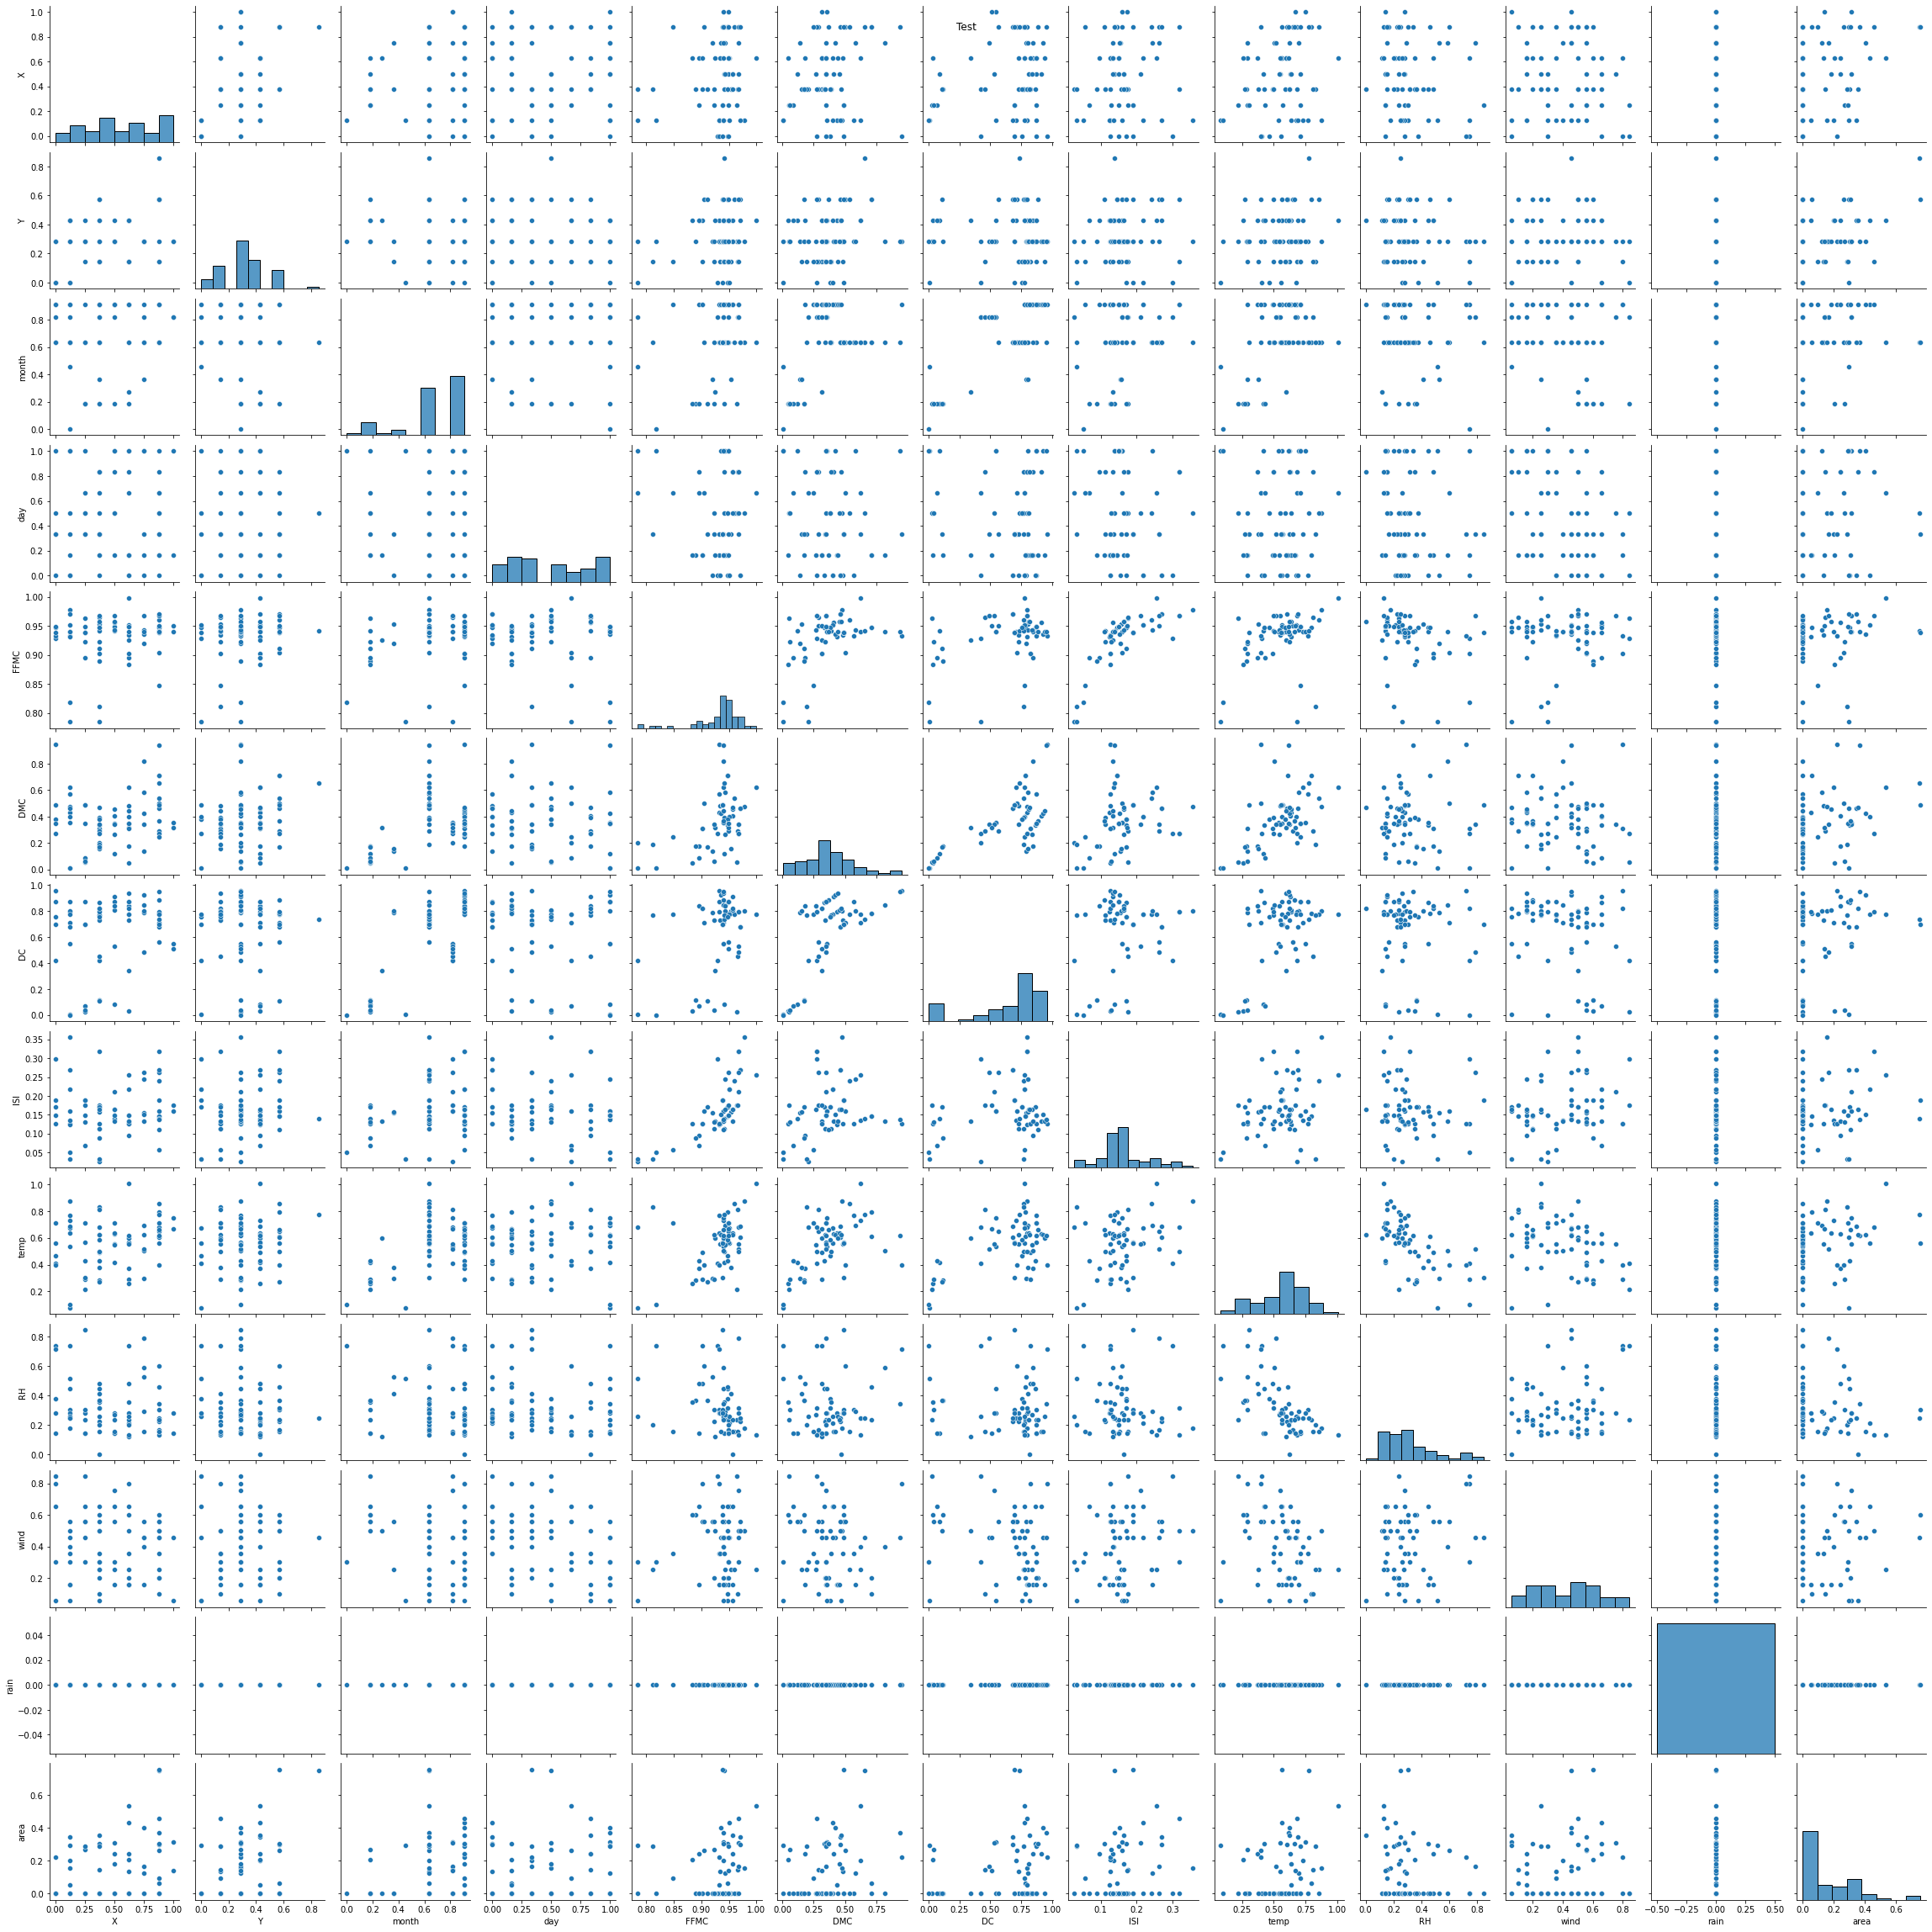

<Figure size 432x288 with 0 Axes>

In [32]:
pairplot_fields = features.copy()

multiple_fields_plot_template(forest_fire_multiple_plots_df_train, 
                              "Train", 
                              "sns.pairplot")

multiple_fields_plot_template(forest_fire_multiple_plots_df_test, 
                              "Test", 
                              "sns.pairplot")

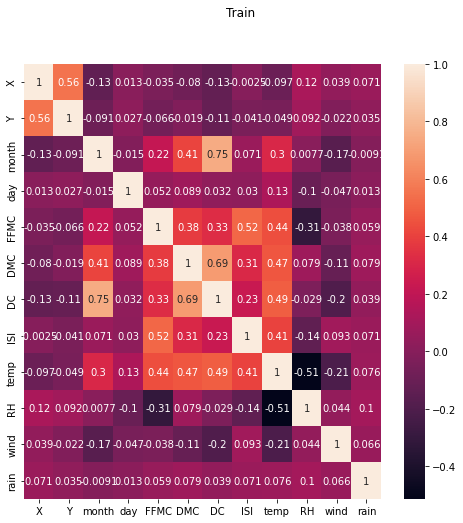

<Figure size 432x288 with 0 Axes>

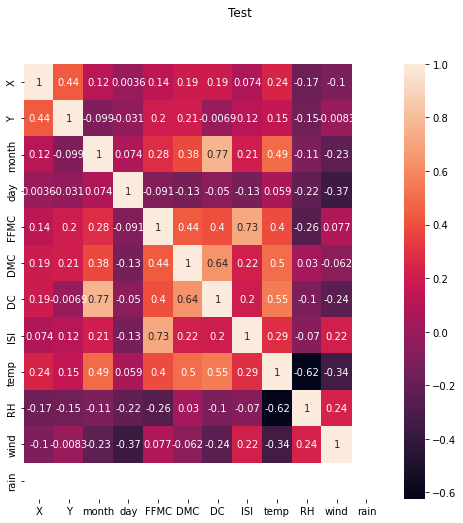

<Figure size 432x288 with 0 Axes>

In [33]:
heatmap_fields = features.copy()

plt.figure(figsize = (8, 8))
multiple_fields_plot_template(forest_fire_multiple_plots_df_train[heatmap_fields].corr(), 
                              "Train", 
                              "sns.heatmap")

plt.figure(figsize = (8, 8))
multiple_fields_plot_template(forest_fire_multiple_plots_df_test[heatmap_fields].corr(), 
                              "Test", 
                              "sns.heatmap")

## Modelling

Inisialisasi variabel global untuk modelling

In [34]:
NUMBER_OF_DATASET_ROWS = x_train_scaled.shape[0]
X_TRAIN_DF = x_train_scaled.copy()
X_TEST_DF = x_test_scaled.copy()
Y_TRAIN_DF = y_train.copy()
Y_TEST_DF = y_test.copy()

Inisialisasi Model

In [35]:
def initialize_model_small_layers():
  # Model dengan layer berjumlah sedikit
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(6, input_dim = number_of_features, activation = "relu"))
  model.add(Dense(1, activation = "relu"))

  return model

def initialize_model_medium_layers():
  # Model dengan layer berjumlah sedang
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(3, input_dim = number_of_features, activation = "relu"))
  model.add(Dense(6, activation = "relu"))
  model.add(Dense(6, activation = "relu"))
  model.add(Dense(1, activation = "relu"))

  return model

def initialize_model_large_layers():
  # Model dengan layer berjumlah banyak
  number_of_features = len(X_TRAIN_DF.columns)

  model = Sequential()
  model.add(Dense(6, input_dim = number_of_features, activation = "relu"))
  model.add(Dense(16, activation = "relu"))
  model.add(Dense(32, activation = "relu"))
  model.add(Dense(16, activation = "relu"))
  model.add(Dense(8, activation = "relu"))
  model.add(Dense(1, activation = "relu"))

  return model

In [36]:
def plot_deep_learning_metrics(history, metric, val_metric, title):
  plt.plot(history.history[metric])
  plt.plot(history.history[val_metric])
  plt.title(title)
  plt.ylabel("Value")
  plt.xlabel("Epochs")
  plt.legend([metric, val_metric], loc="upper right")

Menambahkan Early Stopping dan Model Checkpoint

In [37]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

### Eksperimen ke-1: Komparasi Jumlah Layer dengan karakteristik sebagai berikut.

* **Batch Size**: Disesuaikan dengan jumlah data
* **Epoch Size**: 100
* **Loss Function**: mean_squared_error
* **Learning Rate**: Bawaan dari Optimizers sendiri

In [38]:
model_layers = ["initialize_model_small_layers", 
                "initialize_model_medium_layers", 
                "initialize_model_large_layers"]

In [39]:
histories = []

for index, model_layer in enumerate(model_layers):
  model = eval(model_layer)
  model = model()

  model.compile(
    optimizer = Adam(lr = 0.0001),
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      epochs = 100,
      callbacks = [early_stopping, model_checkpoint],
      verbose = 1,
  )
  histories.append(history)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 2.1178 - accuracy: 0.0178
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.h5
1/1 [==============================] - 1s 869ms/step - loss: 2.1178 - accuracy: 0.0178 - val_loss: 1.5210 - val_accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 2.1171 - accuracy: 0.0178
Epoch 2: val_accuracy did not improve from 0.00000
1/1 [==============================] - 0s 35ms/step - loss: 2.1171 - accuracy: 0.0178 - val_loss: 1.5204 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 2.1163 - accuracy: 0.0178
Epoch 3: val_accuracy did not improve from 0.00000
1/1 [==============================] - 0s 40ms/step - loss: 2.1163 - accuracy: 0.0178 - val_loss: 1.5199 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 2.1156 - accuracy: 0.0178
Epoch 4: val_accuracy did not improve from 0.0

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.2712 - accuracy: 0.4744
Epoch 1: val_accuracy improved from 0.00000 to 0.50000, saving model to best_model.h5
1/1 [==============================] - 1s 660ms/step - loss: 3.2712 - accuracy: 0.4744 - val_loss: 2.6118 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3.2706 - accuracy: 0.4744
Epoch 2: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 39ms/step - loss: 3.2706 - accuracy: 0.4744 - val_loss: 2.6112 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3.2700 - accuracy: 0.4744
Epoch 3: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 38ms/step - loss: 3.2700 - accuracy: 0.4744 - val_loss: 2.6106 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.2693 - accuracy: 0.4744
Epoch 4: val_accuracy did not improve from 0.50000
1/1 [===========

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - ETA: 0s - loss: 3.2710 - accuracy: 0.4744
Epoch 1: val_accuracy did not improve from 0.50000
1/1 [==============================] - 1s 666ms/step - loss: 3.2710 - accuracy: 0.4744 - val_loss: 2.6106 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3.2708 - accuracy: 0.4744
Epoch 2: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 40ms/step - loss: 3.2708 - accuracy: 0.4744 - val_loss: 2.6105 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3.2706 - accuracy: 0.4744
Epoch 3: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 48ms/step - loss: 3.2706 - accuracy: 0.4744 - val_loss: 2.6104 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.2704 - accuracy: 0.4744
Epoch 4: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 43ms/step

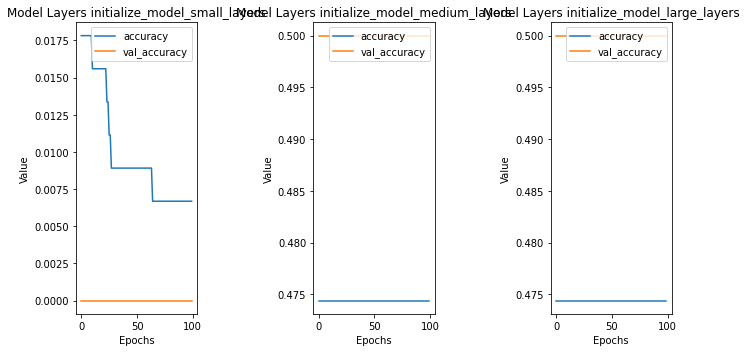

In [40]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(1, 3, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Model Layers {model_layers[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-2: Komparasi Learning Rate dengan karakteristik sebagai berikut.

* **Epoch Size**: 100
* **Batch Size**: Disesuaikan dengan jumlah data
* **Loss Function**: mean_squared_error
* **Learning Rate**: Bawaan dari Optimizers sendiri
* **Jumlah layer**: sedang

In [44]:
learning_rates = [1e-3, 1e-4, 1e-5, 1e-6, 1e-7]

In [52]:
for index, learning_rate in enumerate(learning_rates):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = Adam(learning_rate = learning_rate),
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      epochs = 100,
      callbacks = [early_stopping, model_checkpoint],
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 3.2730 - accuracy: 0.4744
Epoch 1: val_accuracy did not improve from 0.50000
1/1 [==============================] - 1s 555ms/step - loss: 3.2730 - accuracy: 0.4744 - val_loss: 2.6135 - val_accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 3.2730 - accuracy: 0.4744
Epoch 2: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 40ms/step - loss: 3.2730 - accuracy: 0.4744 - val_loss: 2.6135 - val_accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 3.2730 - accuracy: 0.4744
Epoch 3: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 40ms/step - loss: 3.2730 - accuracy: 0.4744 - val_loss: 2.6135 - val_accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 3.2730 - accuracy: 0.4744
Epoch 4: val_accuracy did not improve from 0.50000
1/1 [==============================] - 

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(3, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Learning Rate {learning_rates[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-3: Komparasi Optimizers dengan karakteristik sebagai berikut.

* **Batch Size**: Disesuaikan dengan jumlah data
* **Epoch Size**: 100
* **Batch Size**: Disesuaikan dengan jumlah data
* **Loss Function**: mean_squared_error
* **Learning Rate**: Bawaan dari Optimizers sendiri
* **Jumlah layer**: sedang

In [ ]:
optimizers = ["Adam", "RMSprop", "Adamax", SGD(momentum = 0.8), "Adadelta"]

In [ ]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, optimizer in enumerate(optimizers):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = optimizer,
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      callbacks = [early_stopping, model_checkpoint],
      epochs = 100,
      verbose = 1,
  )
  histories.append(history)

In [ ]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(3, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Optimizer {optimizers[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-4: Komparasi Loss Function dengan karakteristik sebagai berikut.
* **Activation Function**: Disesuaikan dengan Adam
* **Epoch Size**: 100
* **Batch Size**: Disesuaikan dengan jumlah data
* **Learning Rate**: Bawaan dari Optimizers sendiri
* **Jumlah layer**: sedang

In [46]:
losses = ["mean_squared_error", "mean_absolute_error", "mean_squared_logarithmic_error", "poisson"]

In [47]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, loss in enumerate(losses):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = "Adam",
    loss = loss,
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = NUMBER_OF_DATASET_ROWS,
      callbacks = [early_stopping, model_checkpoint],
      epochs = 100,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/100
1/1 [==============================] - ETA: 0s - loss: 2.6405 - accuracy: 0.4499
Epoch 1: val_accuracy did not improve from 0.50000
1/1 [==============================] - 1s 544ms/step - loss: 2.6405 - accuracy: 0.4499 - val_loss: 2.0333 - val_accuracy: 0.4853
Epoch 2/100
1/1 [==============================] - ETA: 0s - loss: 2.6187 - accuracy: 0.4365
Epoch 2: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 34ms/step - loss: 2.6187 - accuracy: 0.4365 - val_loss: 2.0153 - val_accuracy: 0.4559
Epoch 3/100
1/1 [==============================] - ETA: 0s - loss: 2.5971 - accuracy: 0.4098
Epoch 3: val_accuracy did not improve from 0.50000
1/1 [==============================] - 0s 31ms/step - loss: 2.5971 - accuracy: 0.4098 - val_loss: 1.9976 - val_accuracy: 0.4412
Epoch 4/100
1/1 [==============================] - ETA: 0s - loss: 2.5756 - accuracy: 0.4031
Epoch 4: val_accuracy did not improve from 0.50000
1/1 [==============================] - 

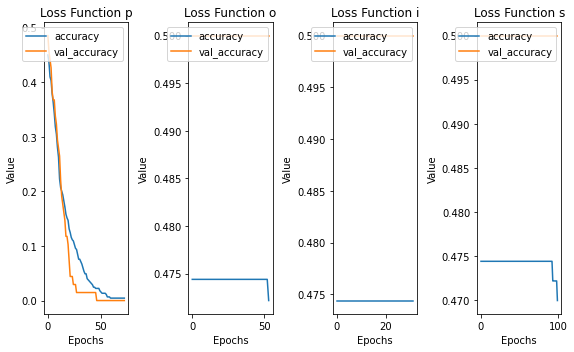

In [48]:
plt.figure(figsize = (10, 5))

for index, history in enumerate(histories):
  plt.subplot(1, 5, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Loss Function {loss[index]}")

plt.tight_layout()
plt.show()

### Eksperimen ke-5: Komparasi Batch Size dengan karakteristik sebagai berikut.

* **Activation Function**: mean squared error
* **Optimizers**: Adam
* **Epoch Size**: 200
* **Batch Size**: Disesuaikan dengan jumlah data
* **Loss Function**: mean_squared_error
* **Learning Rate**: Bawaan dari Optimizers sendiri
* **Jumlah layer**: sedang

In [49]:
batch_sizes = [10, 100, 200, 300, 400, NUMBER_OF_DATASET_ROWS]

In [50]:
histories = []

def root_mean_squared_error(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true))) 

for index, batch_size in enumerate(batch_sizes):
  model = initialize_model_medium_layers()

  model.compile(
    optimizer = "Adam",
    loss = "mean_squared_error",
    metrics = ["accuracy"],
  )

  history = model.fit(
      X_TRAIN_DF,
      Y_TRAIN_DF,
      validation_data = (X_TEST_DF, Y_TEST_DF),
      batch_size = batch_size,
      callbacks = [early_stopping, model_checkpoint],
      epochs = 200,
      verbose = 1,
  )
  histories.append(history)

Epoch 1/200
36/45 [=======================>......] - ETA: 0s - loss: 3.2920 - accuracy: 0.4778 
Epoch 1: val_accuracy did not improve from 0.50000
45/45 [==============================] - 1s 5ms/step - loss: 3.2500 - accuracy: 0.4744 - val_loss: 2.5209 - val_accuracy: 0.5000
Epoch 2/200
33/45 [=====================>........] - ETA: 0s - loss: 2.7883 - accuracy: 0.4879
Epoch 2: val_accuracy did not improve from 0.50000
45/45 [==============================] - 0s 2ms/step - loss: 2.8065 - accuracy: 0.4254 - val_loss: 1.9364 - val_accuracy: 0.2941
Epoch 3/200
30/45 [===================>..........] - ETA: 0s - loss: 2.2501 - accuracy: 0.1200
Epoch 3: val_accuracy did not improve from 0.50000
45/45 [==============================] - 0s 3ms/step - loss: 2.1559 - accuracy: 0.0824 - val_loss: 1.6673 - val_accuracy: 0.0147
Epoch 4/200
31/45 [===================>..........] - ETA: 0s - loss: 1.9682 - accuracy: 0.0000e+00
Epoch 4: val_accuracy did not improve from 0.50000
45/45 [=================

Plot History

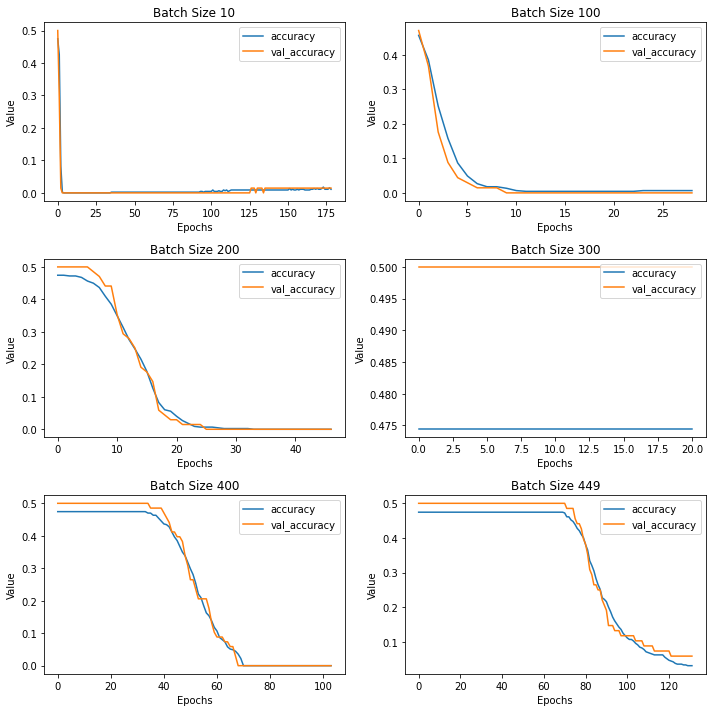

In [51]:
plt.figure(figsize = (10, 10))

for index, history in enumerate(histories):
  plt.subplot(3, 2, index + 1)
  plot_deep_learning_metrics(history, 
                             "accuracy", 
                             "val_accuracy", 
                             f"Batch Size {batch_sizes[index]}")

plt.tight_layout()
plt.show()